# 🌀 Vindkraft – Obligatorisk innlevering i MAT160 H2025.

**Navn:** _Kjetil Sjåberg Steinbakken_

Dette er den obligatoriske innleveringen i MAT160 høsten 2025. Fristen for innlevering er **torsdag 23. oktober kl. 23:59**.

Bruk [denne](https://colab.research.google.com/github/galendal/MAT160/blob/main/obl_oppgaveM160H25.ipynb) Jupyter-filen som utgangspunkt. Lagre en kopi på din egen maskin, og utfør oppgavene ved å legge til nye celler. Når du er ferdig, leverer du filen via Mitt UiB, og bruker ditt eget navn som filnavn.

I denne oppgaven skal du bruke vinddata til å utforske hvordan matematikk kan brukes til å modellere og analysere vindkraftproduksjon. Oppgaven er delt inn i sju deler. Den siste delen er en refleksjon over oppgaven og din bruk av AI i arbeidet. Her forventes mer enn én setning — bruk gjerne anledningen til å tenke gjennom hvordan AI har hjulpet deg, og hva du har lært.

Det er helt greit å samarbeide, men _alle må levere sin egen besvarelse_. Du kan også bruke AI-verktøy, men jeg forventer at du er ærlig om bruken og reflekterer godt i den siste delen.


## 🔹 Forberedelse: Last inn vind-data
Dataen vil bli lastet inn i noe som kalles Pandas, se https://pandas.pydata.org for mer informasjon.
### Meteostat data portalen.

Vi skal bruke et åpent datasett som inneholder relativt ferske værdata fra hele verden. Se https://meteostat.net/no for en generell introduksjon, og https://dev.meteostat.net/python/ for python-biblioteket.

Vi installerer først biblioteket (om nødvendig), og laster det deretter inn:




In [3]:
%pip install meteostat
# Import Meteostat library
from meteostat import Stations, Daily, Hourly
%pip install folium
import folium
from IPython.display import display
import pandas as pd
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt


La oss se på værstasjonene som er nærmest **Bergen** som ligger på $(lat,lon)=(60.392993, 5.324138) $

In [4]:
bergen_txt = "Bergen, Norway"
bergen_latlon = (60.392993, 5.324138)  # Latitude and Longitude for Bergen, Norway
latlon = bergen_latlon
number_of_stations = 25 # Number of stations to fetch
# Get nearby weather stations
stations = Stations()
stations = stations.nearby(latlon[0], latlon[1])
station = stations.fetch(number_of_stations)
# Display nearby stations
display(station.style.set_caption(f"Nearby Weather Stations for {bergen_txt}").background_gradient(cmap='Blues'))

,name,country,region,wmo,icao,latitude,longitude,elevation,timezone,hourly_start,hourly_end,daily_start,daily_end,monthly_start,monthly_end,distance
id,,,,,,,,,,,,,,,,
01317,Bergen / Florida,NO,HO,01317,,60.383300,5.333300,12.000000,Europe/Oslo,1973-01-01 00:00:00,2025-03-21 00:00:00,1957-01-01 00:00:00,2025-08-24 00:00:00,1957-01-01 00:00:00,2022-01-01 00:00:00,1189.574091
01314,Fossmark / Stanghelle,NO,HO,01314,,60.520600,5.724700,10.000000,Europe/Oslo,2012-06-15 00:00:00,2025-03-21 00:00:00,2012-07-14 00:00:00,2021-08-23 00:00:00,2013-01-01 00:00:00,2017-01-01 00:00:00,26146.905215
01327,Kvamskogen-jonshogdi / Kleivi,NO,HO,01327,,60.388600,5.963900,455.000000,Europe/Oslo,2006-11-21 00:00:00,2025-03-21 00:00:00,2006-11-22 00:00:00,2020-08-30 00:00:00,2010-01-01 00:00:00,2017-01-01 00:00:00,35151.370509
01418,Upsanger Lake / Bekkjarvik,NO,HO,01418,,60.016700,5.205800,32.000000,Europe/Oslo,1973-01-01 00:00:00,2025-03-22 00:00:00,2012-05-01 00:00:00,2020-08-31 00:00:00,2013-01-01 00:00:00,2019-01-01 00:00:00,42349.649550
01315,Evanger,NO,HO,01315,,60.646900,6.110600,17.000000,Europe/Oslo,2010-12-14 00:00:00,2025-03-21 00:00:00,2010-12-16 00:00:00,2020-08-31 00:00:00,2012-01-01 00:00:00,2017-01-01 00:00:00,51470.139956
01329,Kvamsoy / Steinstø,NO,HO,01329,,60.357800,6.274700,49.000000,Europe/Oslo,2005-02-18 00:00:00,2025-03-21 00:00:00,2006-02-17 00:00:00,2021-12-12 00:00:00,2010-01-01 00:00:00,2019-01-01 00:00:00,52393.849232
01326,Modalen Iii / Solvang,NO,HO,01326,,60.856100,5.973100,125.000000,Europe/Oslo,2008-10-08 00:00:00,2025-03-21 00:00:00,2008-10-24 00:00:00,2021-12-12 00:00:00,2013-01-01 00:00:00,2018-01-01 00:00:00,62487.103809
ENSO0,Stord / Foldrøyhamn,NO,HO,,ENSO,59.800000,5.350000,49.000000,Europe/Oslo,1986-11-25 00:00:00,2025-09-29 00:00:00,2020-01-20 00:00:00,2022-04-26 00:00:00,NaT,NaT,65953.395760
01319,Takle,NO,SF,01319,,61.033300,5.383300,38.000000,Europe/Oslo,1973-01-01 00:00:00,2025-03-21 00:00:00,2015-01-09 00:00:00,2021-10-25 00:00:00,2015-01-01 00:00:00,2019-01-01 00:00:00,71271.571531


La oss se på dem i et kart.

In [5]:
# Create a map centered at the specified location
m = folium.Map(location=latlon, zoom_start=7)

# Add markers for each station
for idx, row in station.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=f"{row['name']} (WMO: {row['wmo']})",
        tooltip=row['name']
    ).add_to(m)
# Add a circle marker for the specified location
folium.CircleMarker(
        location=[latlon[0], latlon[1]],
        popup=f"Our location: {bergen_txt}",
        tooltip=bergen_txt,
        color='red'
    ).add_to(m)
folium.Marker(
        location=[latlon[0], latlon[1]],
        popup=f"Our location: {bergen_txt}",
        tooltip=bergen_txt,
        icon=folium.Icon(icon='cloud', color='red', icon_color='white', prefix='fa')
    ).add_to(m)
# Display the map
m

In [6]:
# Select stations with names containing "Bergen", "Dyranut", "Utsira", and "Oseberg"
selected_names = ["Bergen", "Utsira", "Oseberg","Dyranut"]
selected_stations = station[station['name'].str.contains('|'.join(selected_names), case=False, na=False)]

# Display the selected stations
display(selected_stations)

,name,country,region,wmo,icao,latitude,longitude,elevation,timezone,hourly_start,hourly_end,daily_start,daily_end,monthly_start,monthly_end,distance
id,,,,,,,,,,,,,,,,
01317,Bergen / Florida,NO,HO,01317,<NA>,60.3833,5.3333,12.0,Europe/Oslo,1973-01-01,2025-03-21,1957-01-01,2025-08-24,1957-01-01,2022-01-01,1189.574091
01352,Dyranut Maurset,NO,46,01352,<NA>,60.1839,7.4814,1250.0,Europe/Oslo,2004-01-07,2025-03-21,2008-12-23,2021-08-23,2013-01-01,2019-01-01,121137.129957
01403,Utsira Fyr,NO,RO,01403,<NA>,59.3000,4.8833,55.0,Europe/Oslo,1928-01-02,2025-09-30,1943-01-01,2025-08-24,1943-01-01,2022-01-01,124003.779827
ENOA0,Oseberg / Oseberga,NO,<NA>,<NA>,ENOA,60.4919,2.8273,15.0,Europe/Oslo,1990-10-19,2025-09-25,2009-09-02,2022-03-21,2020-01-01,2021-01-01,137389.550360


### Hvilke data finnes på serveren?
Definerer en tidsperiode fra februar 2022. Du kan velge en annen periode hvis du vil.

La oss lese inn data fra de valgte stasjonene og se hva vi finner.

In [7]:
# Define the time period for data retrieval
start = datetime(2022, 2, 21) # Start date: February 21, 2022
end = datetime(2022, 3, 1) # End date: March 1, 2022

# Get station IDs for the three selected stations
station_ids = selected_stations.index.tolist()

# Fetch hourly data for each station and store in a dictionary
hourly_data = {}
for sid in station_ids:
    data = Hourly(sid, start, end).fetch()
    hourly_data[sid] = data

# Display the first few rows for each station
for sid, data in hourly_data.items():
    print(f"\nHourly data for station {sid} ({selected_stations.loc[sid, 'name']}):")
    display(data.head())



Hourly data for station 01317 (Bergen / Florida):


,temp,dwpt,rhum,prcp,snow,wdir,wspd,wpgt,pres,tsun,coco
time,,,,,,,,,,,
2022-02-21 00:00:00,1.9,1.8,99.0,2.4,<NA>,150.0,10.1,27.0,971.7,<NA>,<NA>
2022-02-21 01:00:00,2.6,1.1,90.0,0.4,<NA>,139.0,7.6,25.2,972.5,<NA>,<NA>
2022-02-21 02:00:00,2.7,1.4,91.0,0.2,<NA>,135.0,12.2,19.1,973.0,<NA>,<NA>
2022-02-21 03:00:00,2.6,2.0,96.0,0.2,<NA>,129.0,6.1,14.4,972.5,<NA>,<NA>
2022-02-21 04:00:00,2.8,2.4,97.0,0.1,<NA>,136.0,5.8,11.9,973.0,<NA>,<NA>



Hourly data for station 01352 (Dyranut Maurset):


,temp,dwpt,rhum,prcp,snow,wdir,wspd,wpgt,pres,tsun,coco
time,,,,,,,,,,,
2022-02-21 00:00:00,-8.5,-9.4,93.0,0.2,<NA>,90.0,8.6,18.7,975.5,<NA>,<NA>
2022-02-21 01:00:00,-8.9,-9.8,93.0,0.2,<NA>,85.0,10.8,14.4,975.6,<NA>,<NA>
2022-02-21 02:00:00,-9.2,-10.3,92.0,0.2,<NA>,62.0,8.3,14.8,975.5,<NA>,<NA>
2022-02-21 03:00:00,-9.7,-10.8,92.0,0.2,<NA>,55.0,7.9,13.3,975.7,<NA>,<NA>
2022-02-21 04:00:00,-10.0,-11.0,92.0,0.1,<NA>,22.0,5.0,9.7,976.0,<NA>,<NA>



Hourly data for station 01403 (Utsira Fyr):


,temp,dwpt,rhum,prcp,snow,wdir,wspd,wpgt,pres,tsun,coco
time,,,,,,,,,,,
2022-02-21 00:00:00,4.7,2.9,88.0,<NA>,<NA>,309.0,22.0,35.0,972.4,<NA>,18.0
2022-02-21 01:00:00,4.7,2.6,86.0,0.0,<NA>,295.0,40.3,49.0,972.8,<NA>,18.0
2022-02-21 02:00:00,4.5,1.9,83.0,0.0,<NA>,319.0,27.7,62.0,973.4,<NA>,18.0
2022-02-21 03:00:00,5.0,2.4,83.0,0.0,<NA>,302.0,36.0,46.0,973.8,<NA>,18.0
2022-02-21 04:00:00,4.9,2.8,86.0,0.0,<NA>,294.0,37.0,49.0,974.2,<NA>,18.0



Hourly data for station ENOA0 (Oseberg / Oseberga):


,temp,dwpt,rhum,prcp,snow,wdir,wspd,wpgt,pres,tsun,coco
time,,,,,,,,,,,
2022-02-21 00:00:00,6.0,2.1,76.0,0.0,<NA>,250.0,35.3,50.0,970.7,<NA>,<NA>
2022-02-21 01:00:00,6.3,2.0,74.0,0.0,<NA>,275.0,34.9,51.5,971.3,<NA>,<NA>
2022-02-21 02:00:00,5.0,0.9,75.0,0.0,<NA>,290.0,38.9,45.7,971.7,<NA>,<NA>
2022-02-21 03:00:00,6.0,2.1,76.0,0.0,<NA>,290.0,35.3,43.9,972.4,<NA>,<NA>
2022-02-21 04:00:00,6.0,2.1,76.0,0.0,<NA>,290.0,35.3,34.9,973.6,<NA>,<NA>


Hastighetene, middelvind (wspd) og høyeste vindkast (wpgt) er i $km/t$, vi må regne om til $m/s$.   

In [8]:
# Regn om vindhastighet (wspd) og vindkast (wpgt) fra km/t til m/s i data
for sid, data in hourly_data.items():
    data['wspd'] = data['wspd'] * 1000 / 3600  # Convert km/h to m/s
    data['wpgt'] = data['wpgt'] * 1000 / 3600  # Convert km/h to m/s
    hourly_data[sid] = data

La oss se på dataene.

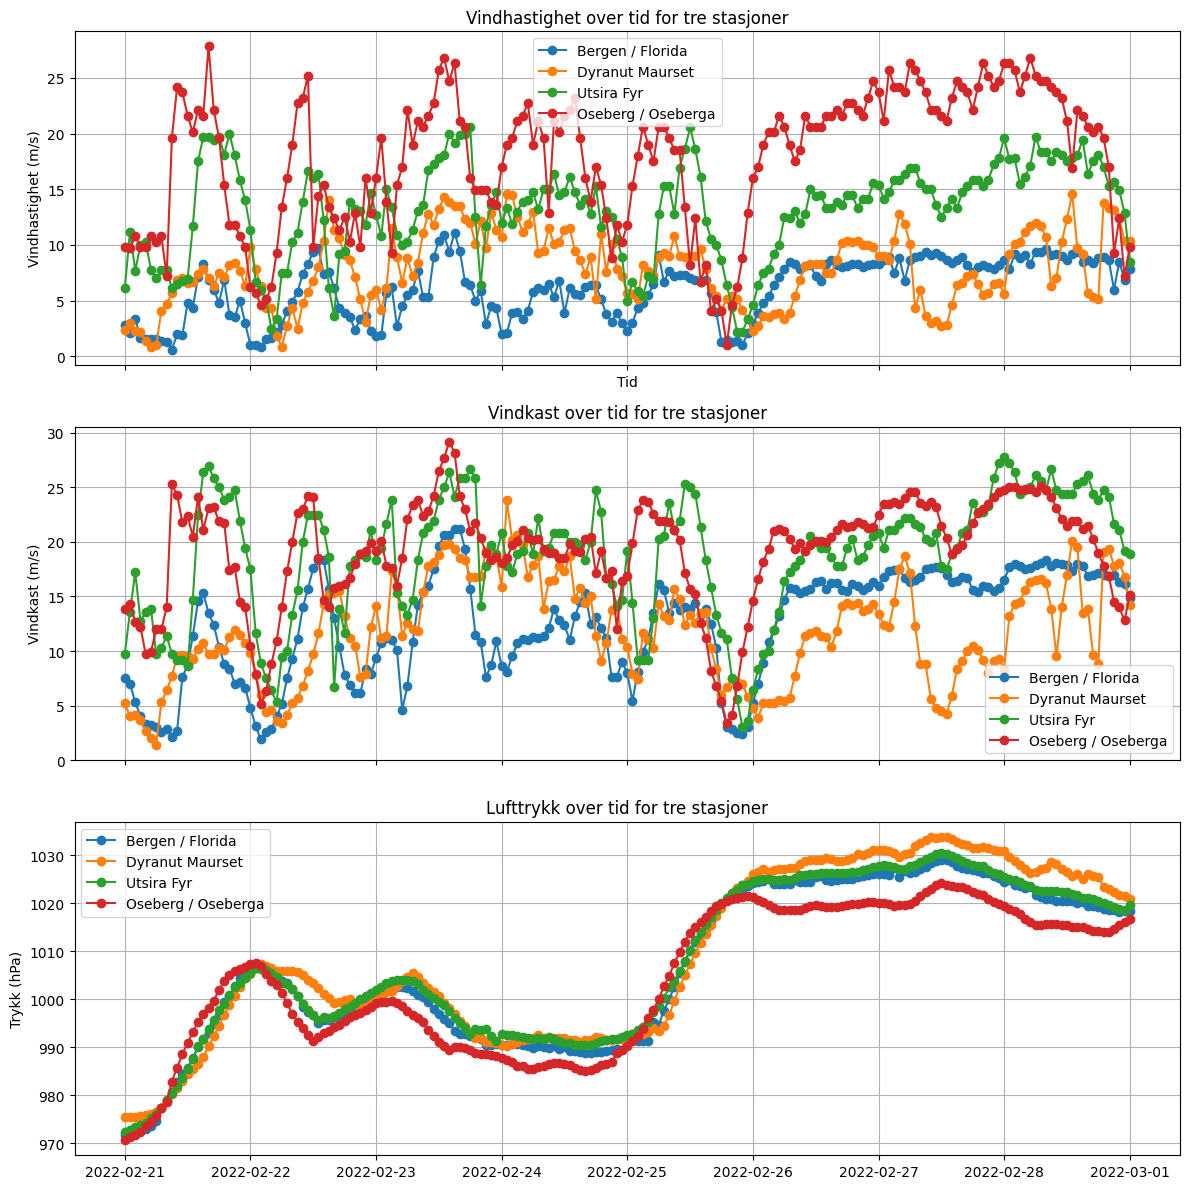

In [9]:
fig, axs = plt.subplots(3, 1, figsize=(12, 12), sharex=True)
# 1. Vindhastighet (wspd)
for sid in station_ids:
    df_station = hourly_data[sid]
    axs[0].plot(df_station.index, df_station['wspd'], marker='o', label=selected_stations.loc[sid, 'name'])

axs[0].set_xlabel('Tid')
axs[0].set_ylabel('Vindhastighet (m/s)')
axs[0].set_title('Vindhastighet over tid for tre stasjoner')
axs[0].legend()
axs[0].grid(True)

# 2. Vindkast (wpgt)
for sid in station_ids:
    df_station = hourly_data[sid]
    axs[1].plot(df_station.index, df_station['wpgt'], marker='o', label=selected_stations.loc[sid, 'name'])
axs[1].set_ylabel('Vindkast (m/s)')
axs[1].set_title('Vindkast over tid for tre stasjoner')
axs[1].legend()
axs[1].grid(True)

# 3. Lufttrykk (pres)
for sid in station_ids:
    df_station = hourly_data[sid]
    axs[2].plot(df_station.index, df_station['pres'], marker='o', label=selected_stations.loc[sid, 'name'])
axs[2].set_ylabel('Trykk (hPa)')
axs[2].set_title('Lufttrykk over tid for tre stasjoner')
axs[2].legend()
axs[2].grid(True)

plt.tight_layout()
plt.show()



## 🔹 Del 1: Bruk av numerisk derivasjon
I denne delen skal du bruke numerisk derivasjon for å undersøke hvordan vindhastighet endrer seg over tid.

**Oppgave:**

**1.** Lag egne Python-funksjoner som beregner den numeriske deriverte (endringsrate) for vindhastighet basert på tidsseriedataene.
- Implementer foroverdifferanse og sentraldifferanse.
- Funksjonene skal ta inn to lister eller arrays: én for tid og én for vindhastighet.

**2.** Test funksjonene dine med en kjent funksjon.

**3.** Plott de numeriske deriverte for vindhastighet for en av stasjonene: Bruk samme figur for å vise både foroverdifferanse og sentraldifferanse. Merk aksene tydelig og legg til en forklarende figurtekst.

**3.** Diskuter forskjellene mellom de to metodene i figuren.

**(Valgfritt)** Glatt dataserien før derivasjon: eksempel _df['gliding_mean'] = df['value'].rolling(window=3).mean()_, se også https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html




In [23]:
# function for forward difference derivative
def fwd_derivative(y, x):
    derivative = []
    for n in range(len(y)-1):
        # expression in append function is dy/dx which is the derivative of a function
        derivative.append(y[n+1]-y[n]/(x[n+1] - x[n]))
    return derivative

# function for central difference derivative
def cnt_derivatvive(y, x):
    derivative = []
    for n in range(1, len(y)-1):
        # expression in append function is dy/dx which is the derivative of a function
        derivative.append(y[n+1]-y[n-1]/(x[n+1] - x[n-1]))
    return derivative

for sid in hourly_data:
  print(hourly_data[sid])


                     temp  dwpt  rhum  prcp  snow   wdir      wspd       wpgt  \
time                                                                            
2022-02-21 00:00:00   1.9   1.8  99.0   2.4  <NA>  150.0  2.805556        7.5   
2022-02-21 01:00:00   2.6   1.1  90.0   0.4  <NA>  139.0  2.111111        7.0   
2022-02-21 02:00:00   2.7   1.4  91.0   0.2  <NA>  135.0  3.388889   5.305556   
2022-02-21 03:00:00   2.6   2.0  96.0   0.2  <NA>  129.0  1.694444        4.0   
2022-02-21 04:00:00   2.8   2.4  97.0   0.1  <NA>  136.0  1.611111   3.305556   
...                   ...   ...   ...   ...   ...    ...       ...        ...   
2022-02-28 20:00:00   4.4   3.4  93.0   1.1  <NA>  164.0  8.611111  16.888889   
2022-02-28 21:00:00   4.6   2.5  86.0   1.0  <NA>  153.0       6.0       17.0   
2022-02-28 22:00:00   4.8   3.8  93.0   1.4  <NA>  169.0       8.5  16.305556   
2022-02-28 23:00:00   4.6   2.3  85.0   1.9  <NA>  149.0  6.888889  16.111111   
2022-03-01 00:00:00   4.6   

## 🔹 Del 2: Ikke-lineær ligning
Vindkraft er energi som utvinnes fra bevegelsen i luftmassene. Når vinden blåser gjennom rotorbladene på en vindturbin, overføres noe av vindens kinetiske energi til rotoren, som igjen driver en generator og produserer elektrisk kraft.

Effekten som kan hentes ut fra vinden, er gitt ved formelen:
$$P(v) = \frac{1}{2} \cdot \rho \cdot A \cdot C_p \cdot v^3$$

I oppgaven bruk:
- $ \rho $ er luftens tetthet (kg/m³), bruk: $ \rho = 1.225 \text{ kg/m}^3 $
- $ A $ er arealet vinden treffer (arealet av rotoren, $A = \pi r^2$), bruk: $ r = 40 \text{ m} \Rightarrow A = \pi r^2 $
- $ C_p $ er effektkoeffisienten, som beskriver hvor stor andel av vindens energi som faktisk kan omdannes til elektrisitet (teoretisk maksimum er Betz-grensen, ca. 0.59, men praktisk ofte 0.4), bruk $ C_p = 0.4 $
- $ v $ er vindhastigheten (m/s)

Formelen viser at effekten øker med tredje potens av vindhastigheten, noe som betyr at små endringer i vind gir store utslag i effekt.

**Oppgave:** Finn vindhastigheten som gir en effekt på 500 kW. Bruk Halveringsmetoden-, Newton- og Sekant-metodene. Sammenlign dine resultater med _scipy.optimize.fsolve_ og finn feilen for metodene.

## 🔹 Del 3: Numerisk integrasjon, beregn potensiell energiproduksjon.


I denne oppgaven skal du selv kode opp numeriske integrasjonsmetoder for å beregne total potensiell energi produsert av vindkraft for de fire utvalgte stasjonene i perioden.

**Oppgave:**
1. Skriv dine egne Python-funksjoner for numerisk integrasjon med:
    - Trapesmetoden
    - Midtpunktsmetoden
    - Simpsons metode (forutsetter partall antall intervaller)
2. Test funksjonene dine på et enkelt datasett der du kjenner fasiten, for å sjekke at de gir riktige resultater. En mulighet er å bruke en funksjon du kjenner integralet til.
3. For hver av de fire stasjonene, bruk vindhastighetsdataene til å beregne effekt $P(v)$ for hver time, og integrer effekten over perioden med alle tre metodene.
4. Sammenlign resultatene fra de ulike metodene og diskuter eventuelle forskjeller.
5. Kan du forklare eventuelle forskjeller mellom stasjonene.

**Tips:**   
- Husk å bruke riktig tidsenhet (timer) i integrasjonen slik at du får energien i kWh.
- Du kan bruke `hourly_data[sid]['wspd']` for vindhastighet (i m/s) og `hourly_data[sid].index` for tidspunkter.



## 🔹 Del 4: Interpolasjon
Her skal du:

1. Ta ut hvert tredje datapunkt fra vindhastighetsserien.
2. Lag to interpolasjonsrutiner: én med Lagrange-polynomer og én med splines.
3. Interpoler vindhastigheten for alle tidspunkter mellom punktene, og sammenlign med de faktiske målingene.
4. Plott både de opprinnelige dataene, de utvalgte punktene og de to interpolerte kurvene. Forklar hvorfor du har valgt å presentere dem på denne måten.
5. For en av stasjonene, bruke delte differanser for å se om feilen endrer seg for de to første utelatte punktene i tidsserien hvis du legger til nye data punkter fra tidsserien med hvert tredje datapunkt.  

**Tips:**  
- Beregn og vis gjerne feilen (f.eks. RMSE) mellom de interpolerte verdiene og de faktiske målingene.

## 🔹 Del 5: Lineær modelltilpasning

For hver stasjon, plott et spredningsdiagram (scatterplot) mellom middelvind (`wspd`) og vindkast (`wpgt`), og tilpass en rett linje (lineær modell) med minste kvadraters metode (least squares). Vis både datapunktene og den tilpassede linjen i figuren. Hvor god er en slik model for de fire stasjonene?

## 🔹 Del 6:  

1. **Oppgave:**  
    a) Sett en maksgrense for vindkast (`wpgt_max`, f.eks. 25 m/s).  
    b) Regn ut hvor mye energi som produseres i perioden dersom turbinen skrus av (dvs. effekt = 0) i alle tidsintervaller der `wpgt` overstiger denne grensen.  
    c) Diskuter hvordan dette påvirker energiproduksjonen sammenlignet med uten grense.

2. **Ekstra utfordring:**  
    Vi kan ikke alltid måle eller forutsi vindkast nøyaktig.  
    a) Kan du bruke modellen som predikerer vindkast (`wpgt`) ut fra middelvind (`wspd`) til å estimere når turbinen bør skrus av, basert på middelvind alene (f.eks. skrus av når predikert gust overstiger grensen).  
    b) Sammenlign energiproduksjonen og diskuter forskjellen mellom å bruke faktisk gust og predikert gust for styring av turbinen.  

**Tips:**  
- Bruk NumPy eller pandas til å sette effekt til 0 der `wpgt` (eller predikert `wpgt`) er over grensen.  
- Visualiser gjerne hvilke tidspunkter turbinen er aktiv/inaktiv.  
- Diskuter usikkerheten ved å bruke en slik modell i praksis.

## 🔹 Del 7: Refleksjon

**Oppgave:**

1. Reflekter over hva du har lært gjennom å løse denne oppgaven.  
    - Hvilke matematiske og programmeringstekniske ferdigheter har du fått brukt og utviklet?
    - Var det noen deler av oppgaven du syntes var spesielt utfordrende eller interessante?

2. Reflekter over bruken av AI i arbeidet med oppgaven.  
    - Har du brukt AI-verktøy (for eksempel ChatGPT, Copilot eller lignende) i arbeidet?  
    - Beskriv konkret hva du har brukt AI til (for eksempel idéutvikling, feilsøking, koding, forklaringer, dokumentasjon osv.).
    - Diskuter fordeler og eventuelle ulemper ved å bruke AI som støtte i slike oppgaver.  
    - Hvordan påvirker bruken av AI din egen læring og forståelse?